In [13]:
import pandas as pd
from scipy import stats
import numpy as np
import gseapy as gp
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
imaging_types = ['CSA','CT','ALFF','ReHo']
rdata = np.zeros((66,4))
for i in range(4):
    imaging_type = imaging_types[i]
    file_path = 'results/imaging_associations/' + imaging_type + '_corr_PC1.csv'
    tmpdata = pd.read_csv(file_path)
    rdata[:,i] = tmpdata['r'].values

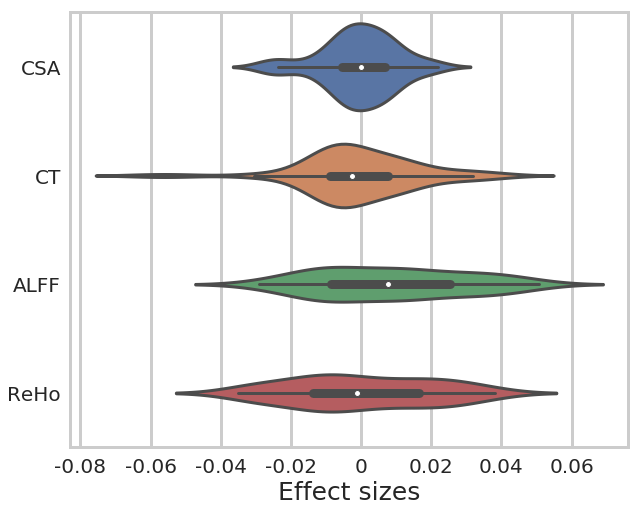

In [15]:
gs = []
xs = []
for i in range(66):
    for j in range(4):
        xs.append(rdata[i,j])
        gs.append(imaging_types[j])
df = pd.DataFrame(dict(x=xs, g=gs))
sns.set_theme(style="whitegrid")
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10, 8))

sns.violinplot(data=df, x="x", y="g",linewidth=3)
ax.set_yticklabels(imaging_types, size = 20)
ax.set_xticklabels([-0.081,-0.08,-0.06,-0.04,-0.02,0,0.02,0.04,0.06], size = 20)
plt.xlabel('Effect sizes',fontsize=25)
# Tweak the visual presentation
ax.xaxis.grid(True,linewidth=3)
ax.set(ylabel="")
ax.spines['top'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
plt.savefig('results/statistical_figures/effect_sizes.png', dpi=300,bbox_inches = 'tight')

In [16]:
PC = pd.read_csv('results/imaging_associations/func_PCs.csv').iloc[:,0:1].values
mdata = np.hstack((rdata,PC))

labels = ['CSA','CT','ALFF','ReHo','funcPC1']
corr = np.zeros((mdata.shape[1],mdata.shape[1]))
for i in range(mdata.shape[1]):
    for j in range(mdata.shape[1]):
        x1 = mdata[:,i]
        x2 = mdata[:,j]
        r,p = stats.spearmanr(x1,x2)
        corr[i,j] = r

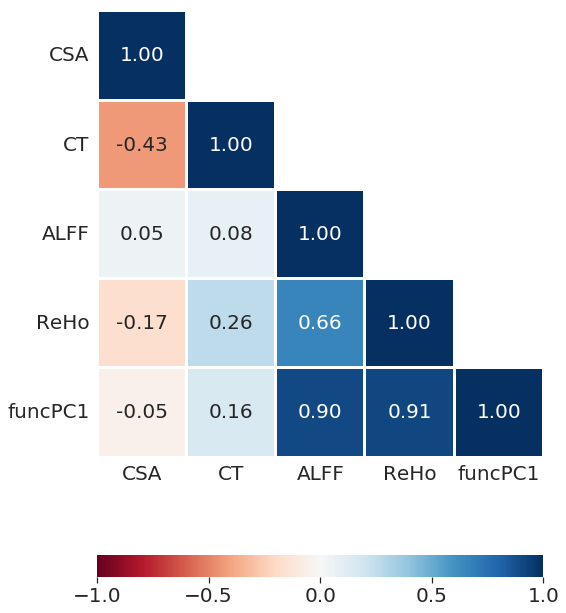

In [29]:
fig = plt.figure(figsize=(8,12)) 

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
mask[np.diag_indices_from(mask)] = False
ax = sns.heatmap(corr, cmap='RdBu', square=True,vmin=-1, vmax=1, annot=True, fmt="0.2f",mask=mask,xticklabels=labels,\
            yticklabels=labels,linewidths=2,annot_kws={"size": 20,},cbar_kws = dict(use_gridspec=False,location="bottom"))

plt.setp(ax.get_yticklabels(), rotation=0, ha="right",va="center",
         rotation_mode="anchor",fontsize=20)
plt.setp(ax.get_xticklabels(), 
         rotation_mode="anchor",fontsize=20)
plt.tick_params(direction='out', length=4, width=2)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)
# plt.show()
fig.savefig('results/statistical_figures/heatmap.png',dpi=300,bbox_inches = 'tight')


In [30]:
def plot_bar_figure(tmp_data,figure_size,output_file):
    f, ax = plt.subplots(figsize=figure_size)
    sns.barplot(x="total", y="abbrev", data=crashes,
            label="Total", color="b")
    plt.show()

/data/sliu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


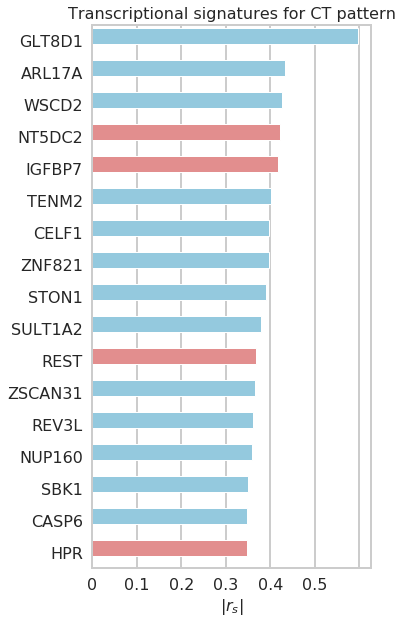

In [6]:
df_com_genes_CT = pd.read_csv('results/expression_associations/sig_genes_CT.csv')
df_com_genes_CT1 = df_com_genes_CT[df_com_genes_CT['fdr_p'] < 0.05]

sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(5,10))
palette = []
for i in range(df_com_genes_CT1.shape[0]):
    if df_com_genes_CT1['r'].iloc[i] > 0:
        palette.append('skyblue')
    else:
        palette.append('lightcoral')
df_com_genes_CT1['r'] = abs(df_com_genes_CT1['r'].values)
sns.barplot(x="r", y="genes", data=df_com_genes_CT1, palette = palette)
for patch in ax.patches :
    patch.set_height(0.5)

ax.set_yticklabels(df_com_genes_CT1['genes'].values, size = 16)
ax.set_xticklabels([0,0.1,0.2,0.3,0.4,0.5], size = 16)
plt.xlabel('|$r_{s}$|',fontsize=16)
plt.ylabel('')
plt.title('Transcriptional signatures for CT pattern',fontsize=16)
ax.xaxis.grid(True,linewidth=2)
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
plt.savefig('results/statistical_figures/GWAS_genes_to_CT.png', dpi=300,bbox_inches = 'tight')

In [34]:
def plot_gwas_genes(tmp_data,figure_size,mytitle,output_file):
    
    fig = plt.figure(figsize=figure_size)
    ax = plt.subplot(111, polar=True)
    plt.axis('off')
    plt.title(mytitle,fontsize=24)
    tgenes = tmp_data['genes'].values.tolist()
    tmp_data1 = tmp_data[tmp_data['fdr_p'] < 0.05]
    genes = tmp_data1['genes'].values.tolist()
    rest_genes = list(set(tgenes) - set(genes))
    genes.append(rest_genes[0])
    genes.append(rest_genes[1])
    tmp_data = tmp_data.set_index('genes').loc[genes]
    
    N_genes = len(genes)
    my_colors = []
    for i in range(N_genes):
        if tmp_data['r'].iloc[i] > 0:
            my_colors.append('skyblue')
        else:
            my_colors.append('lightcoral')
    abs_r = 50*abs(tmp_data['r'].values)
    width = 2*np.pi / N_genes
    indexes = list(range(1, N_genes+1))
    angles = [element * width for element in indexes]
    
    bars1 = ax.bar(
        x=angles, 
        height=abs_r, 
        width=width, 
        bottom=10,
        linewidth=2, 
        edgecolor="white",
        color = my_colors)


    labelPadding = 1
    # Add labels
    for bar, angle, height, label in zip(bars1,angles, abs_r, genes):

        # Labels are rotated. Rotation must be specified in degrees :(
        rotation = np.rad2deg(angle)

        # Flip some labels upside down
        alignment = ""
        if angle >= np.pi/2 and angle < 3*np.pi/2:
            alignment = "right"
            rotation = rotation + 180
        else: 
            alignment = "left"
        if label == "CADM2":
            ax.text(
            x=angle, 
            y=10 + bar.get_height() + labelPadding, 
            s=label, 
            ha=alignment,
            weight='bold',
            va='center', 
            rotation=rotation, 
            rotation_mode="anchor",
            fontsize=24) 
        else:
            ax.text(
                x=angle, 
                y=10 + bar.get_height() + labelPadding, 
                s=label, 
                ha=alignment, 
                va='center', 
                rotation=rotation, 
                rotation_mode="anchor",
                fontsize=24) 

    fig.savefig(output_file,dpi=300,bbox_inches = 'tight')

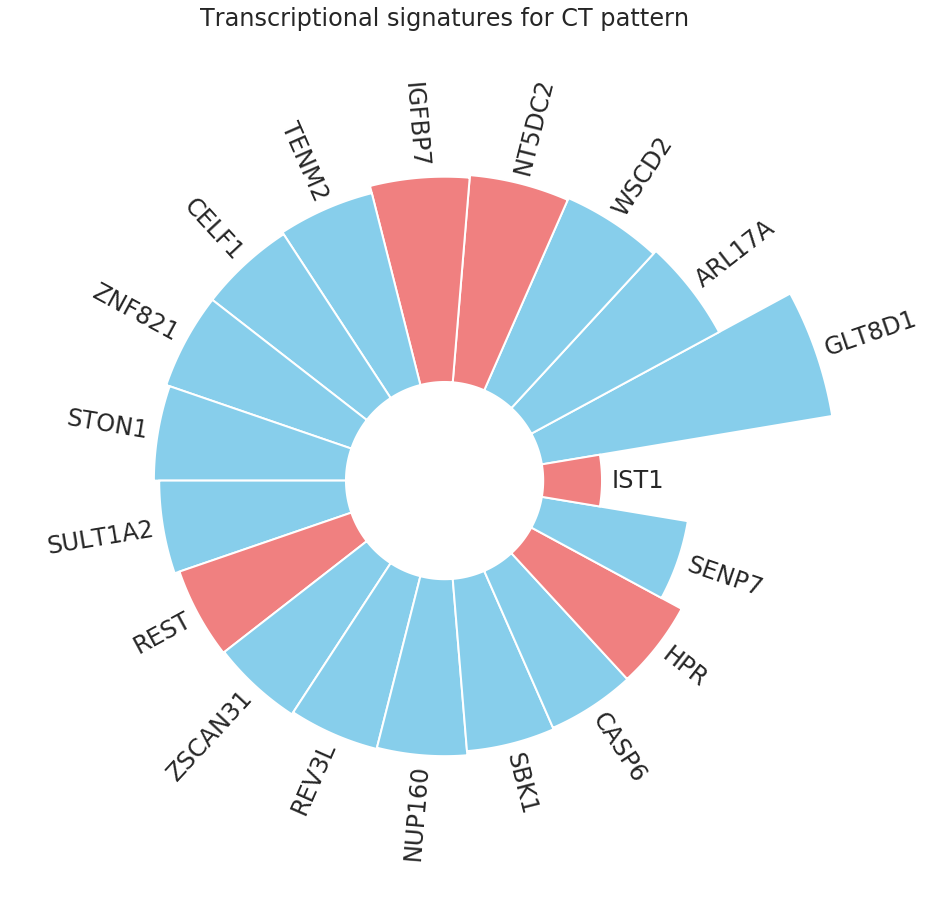

In [35]:
df_com_genes_CT = pd.read_csv('results/expression_associations/sig_genes_CT.csv')
plot_gwas_genes(df_com_genes_CT,(30,15),"Transcriptional signatures for CT pattern",'results/statistical_figures/GWAS_genes_to_CT2.png')

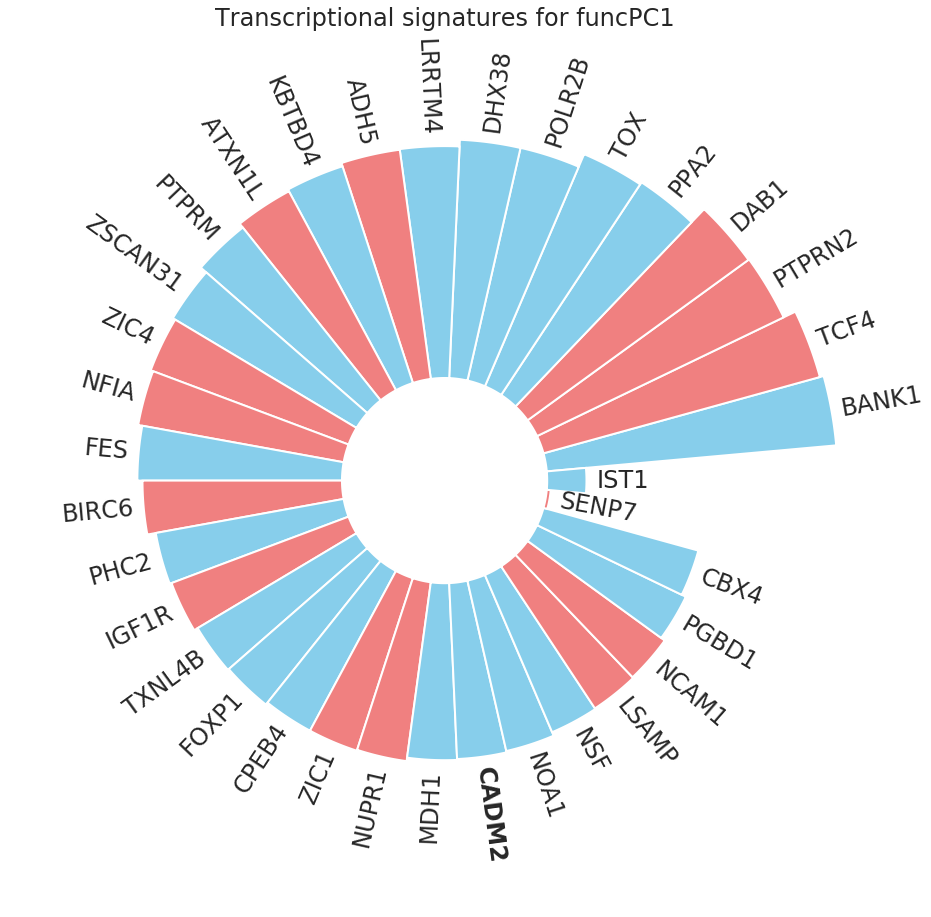

In [8]:
df_com_genes_funcPC1 = pd.read_csv('results/expression_associations/sig_genes_funcPC1.csv')
plot_gwas_genes(df_com_genes_funcPC1,(30,15),"Transcriptional signatures for funcPC1",'results/statistical_figures/GWAS_genes_to_funcPC1.png')

In [9]:
df_com_genes_funcPC1 = df_com_genes_funcPC1[df_com_genes_funcPC1['fdr_p'] < 0.05]
genes1 = df_com_genes_funcPC1['genes'].values.tolist()

In [11]:
genes2 = df_com_genes_CT1['genes'].values.tolist()

In [12]:
set(genes1) & set(genes2)

{'ZSCAN31'}

In [11]:
def plot_scatter1(x,y,col_x,col_y,marker_c,output_path):
    sns.set_theme(style="ticks")
    tmp_data = pd.DataFrame(data=x,columns=[col_x])
    tmp_data[col_y] = y
    fig = plt.figure(figsize=(8,8)) 
    sns.regplot(x=col_x,y=col_y, data=tmp_data,color=marker_c,scatter_kws={'s':60}, line_kws={'linewidth':8})
    plt.tick_params(direction='out', length=6, width=3,labelsize=30)
    plt.ylabel(col_y,fontsize=30)
    plt.xlabel(col_x,fontsize=30)
#     output_path = 'Results/figures/PC1_to_CT_differences.png'
    plt.show()
    fig.savefig(output_path,dpi=300,bbox_inches = 'tight')

In [12]:
allgenes_PCs = pd.read_csv('results/expression_associations/gene_PCs.csv')
CT_corr = pd.read_csv('results/imaging_associations/CT_corr_PC1.csv') 
funcPC1_corr = pd.read_csv('results/imaging_associations/func_PCs.csv') 

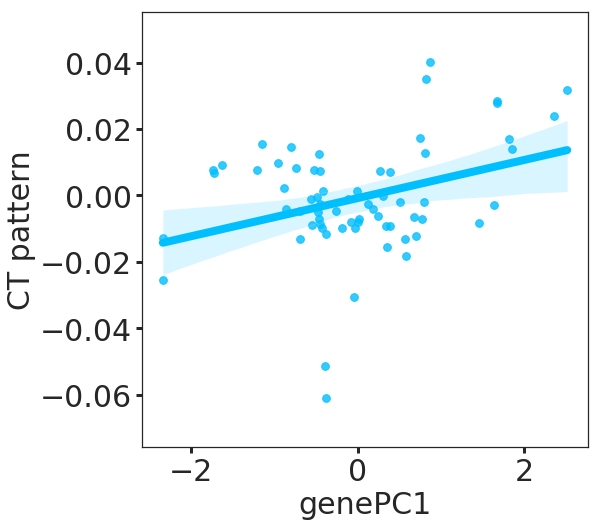

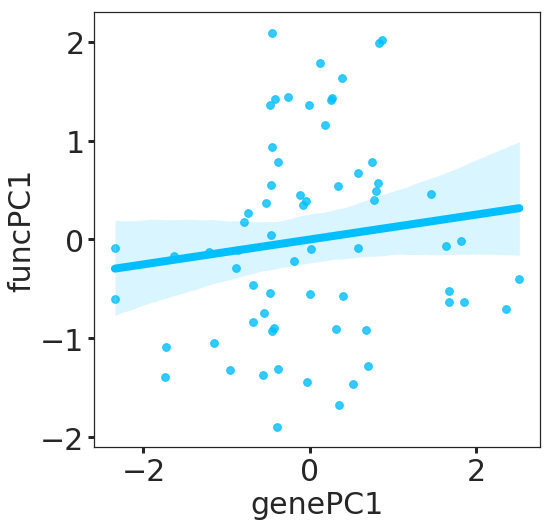

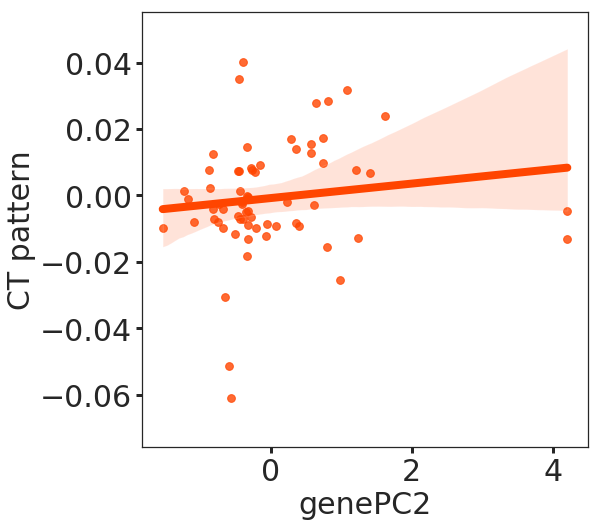

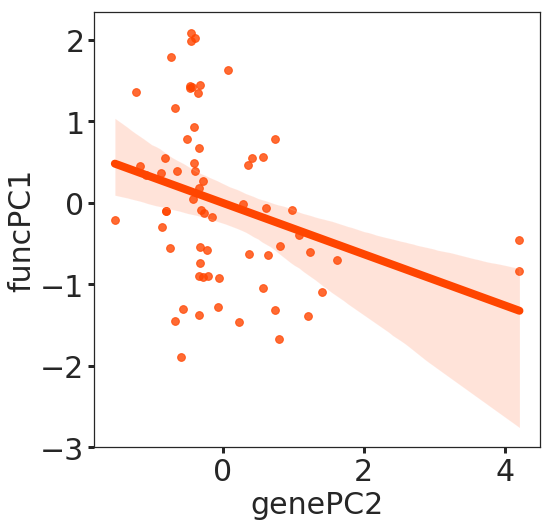

In [38]:
plot_scatter1(allgenes_PCs['PC1'].values,CT_corr['r'].values,'genePC1','CT pattern',\
             'deepskyblue','results/statistical_figures/allgenes_PC1_CT.png')

plot_scatter1(allgenes_PCs['PC1'].values,funcPC1_corr['PC1'].values,'genePC1','funcPC1',\
             'deepskyblue','results/statistical_figures/allgenes_PC1_funcPC1.png')

plot_scatter1(allgenes_PCs['PC2'].values,CT_corr['r'].values,'genePC2','CT pattern',\
             'orangered','results/statistical_figures/allgenes_PC2_CT.png')

plot_scatter1(allgenes_PCs['PC2'].values,funcPC1_corr['PC1'].values,'genePC2','funcPC1',\
             'orangered','results/statistical_figures/allgenes_PC2_funcPC1.png')

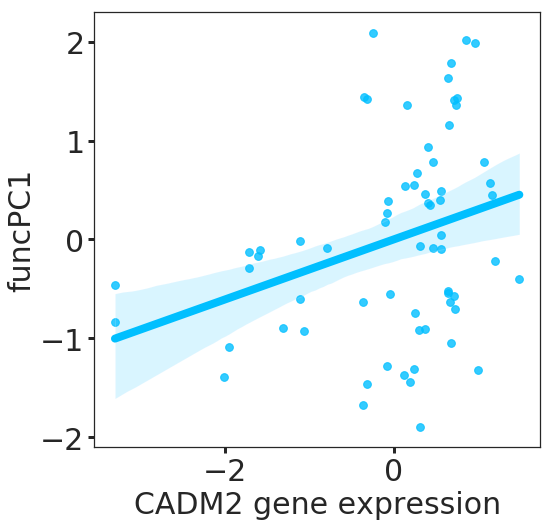

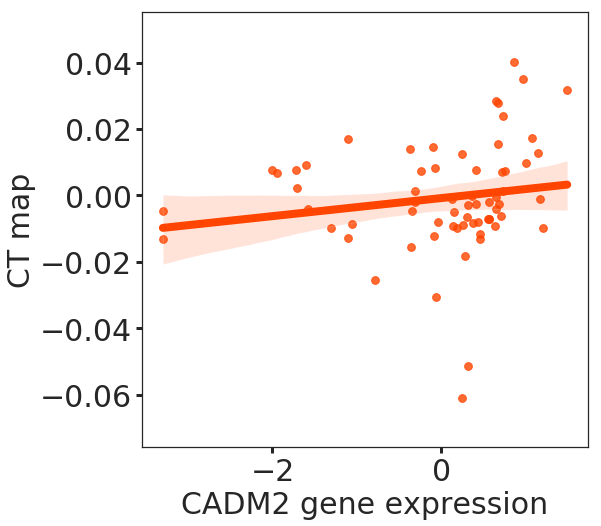

In [28]:
regions = CT_corr['regions'].values.tolist()
DK_allen_exp = pd.read_csv('raw_data/Allen_exp_DK_atlas.csv').set_index('gene_symbol')[regions]
CADM2 = stats.zscore(DK_allen_exp.loc['CADM2'].values)
plot_scatter1(CADM2,funcPC1_corr['PC1'].values,'CADM2 gene expression','funcPC1',\
             'deepskyblue','results/statistical_figures/CADM2_funcPC1.png')
plot_scatter1(CADM2,CT_corr['r'].values,'CADM2 gene expression','CT map',\
             'orangered','results/statistical_figures/CADM2_CT.png')

In [16]:
allgenes_CT_corr = pd.read_csv('results/expression_associations/all_genes_CT.csv')
allgenes_funcPC1_corr = pd.read_csv('results/expression_associations/all_genes_funcPC1.csv')

/data/sliu/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/data/sliu/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/data/sliu/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/data/sliu/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_b

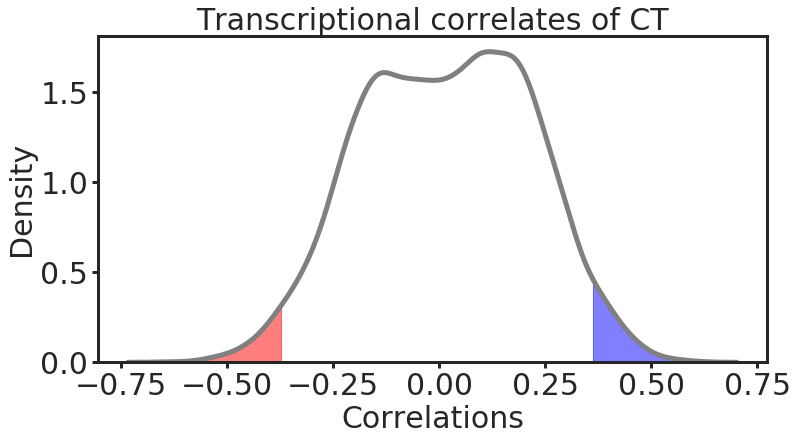

In [18]:
fig = plt.figure(figsize=(12,6)) 
ax = sns.distplot(allgenes_CT_corr["r"].values, kde=True, hist=None,kde_kws={"linewidth": 5,'color':'gray'})
l = ax.lines[0]
lx = l.get_xydata()[:,0]
ly = l.get_xydata()[:,1]
t1 = np.where(lx > 0.36)[0][0]
lx1 = lx[t1:]
ly1 = ly[t1:]
ax.fill_between(lx1, ly1, color="blue", alpha=0.5)

t2 = np.where(lx < -0.36)[0][-1]
lx2 = lx[:t2]
ly2 = ly[:t2]
ax.fill_between(lx2, ly2, color="red", alpha=0.5)

plt.title("Transcriptional correlates of CT",fontsize=30)
plt.tick_params(direction='out', length=6, width=3,labelsize=30)
plt.ylabel("Density",fontsize=30)
plt.xlabel("Correlations",fontsize=30)
ax.spines['top'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
fig.savefig("results/statistical_figures/Hist_CT.png",dpi=300,bbox_inches = 'tight')

/data/sliu/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/data/sliu/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/data/sliu/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/data/sliu/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_b

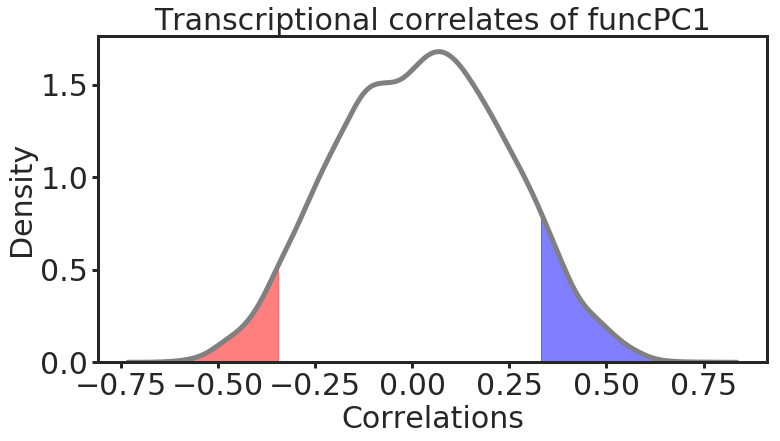

In [19]:
fig = plt.figure(figsize=(12,6)) 
ax = sns.distplot(allgenes_funcPC1_corr["r"].values, kde=True, hist=None,kde_kws={"linewidth": 5,'color':'gray'})
l = ax.lines[0]
lx = l.get_xydata()[:,0]
ly = l.get_xydata()[:,1]
t1 = np.where(lx > 0.33)[0][0]
lx1 = lx[t1:]
ly1 = ly[t1:]
ax.fill_between(lx1, ly1, color="blue", alpha=0.5)

t2 = np.where(lx < -0.33)[0][-1]
lx2 = lx[:t2]
ly2 = ly[:t2]
ax.fill_between(lx2, ly2, color="red", alpha=0.5)

plt.tick_params(direction='out', length=6, width=3,labelsize=30)
plt.title("Transcriptional correlates of funcPC1",fontsize=30)
plt.ylabel("Density",fontsize=30)
plt.xlabel("Correlations",fontsize=30)
ax.spines['top'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
fig.savefig("results/statistical_figures/Hist_funcPC1.png",dpi=300,bbox_inches = 'tight')